# Import packages and set notebook settings

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%%html
<style>
table {float:left}
</style>

## Load data files

In [4]:
beers = pd.read_csv(
    'data/beers.csv',
    dtype={'id': 'object'},
    index_col=0,
    ).set_index('id')

In [5]:
breweries = pd.read_csv(
    'data/breweries.csv',
    index_col=0,
    dtype={'index': 'object'},
)

## Data dictionaries

### `beers.csv`

| Column | Definition |
|:-------|:-----------|
| abv | The alcoholic content by volume with 0 being no alcohol and 1 being pure alcohol |
| ibu | International bittering units, which describe how bitter a drink is |
| id | Unique ID |
| name | Name of the beer |
| style | Beer style (lager, ale, IPA, etc.) |
| brewery_id | Unique identifier for brewery that produces this beer |
| ounces | Size of beer in ounces |

### `breweries.csv`

| Column | Definition |
|:-------|:-----------|
| brewery_id | Unique ID |
| name | Name of the brewery |
| city | City that the brewery is located in |
| state | State that the brewery is located in |

## Joining the data

In [6]:
df = beers.merge(
    breweries,
    how='left',
    left_on='brewery_id',
    right_index=True,
    suffixes=('_beer', '_brewery')
).astype({
    'brewery_id': 'object'
})

# Exploring the data

Preview the data.

In [7]:
df.sample(5)

,abv,ibu,name_beer,style,brewery_id,ounces,name_brewery,city,state
id,,,,,,,,,
792,0.061,94.0,Caldera IPA (2007),American IPA,155,12.0,Caldera Brewing Company,Ashland,OR
1481,0.070,51.0,51K IPA,American IPA,12,12.0,Blackrocks Brewery,Marquette,MI
47,0.084,82.0,Ballz Deep Double IPA,American Double / Imperial IPA,481,16.0,7 Seas Brewing Company,Gig Harbor,WA
2147,0.052,NaN,#003 Brown & Robust Porter,American Porter,211,12.0,Wisconsin Brewing Company,Verona,WI
1225,0.052,7.0,Point Nude Beach Summer Wheat,American Pale Wheat Ale,131,16.0,Stevens Point Brewery,Stevens Point,WI


In [8]:
df.shape

(2410, 9)

Verify the column data types.

In [9]:
df.dtypes

abv             float64
ibu             float64
name_beer        object
style            object
brewery_id       object
ounces          float64
name_brewery     object
city             object
state            object
dtype: object

Ensure all of the ids are unique.

In [10]:
df.index.nunique() == len(df)

True

Check for missing data.

In [11]:
df.isna().sum()

abv               62
ibu             1005
name_beer          0
style              5
brewery_id         0
ounces             0
name_brewery       0
city               0
state              0
dtype: int64

## Fixing missing data

### Looking at `style`

In [12]:
df[df['style'].isna()]

,abv,ibu,name_beer,style,brewery_id,ounces,name_brewery,city,state
id,,,,,,,,,
2210,NaN,NaN,Special Release,NaN,29,16.0,Cedar Creek Brewery,Seven Points,TX
1635,0.060,21.0,Kilt Lifter Scottish-Style Ale,NaN,160,12.0,Four Peaks Brewing Company,Tempe,AZ
2527,0.053,27.0,OktoberFiesta,NaN,66,12.0,Freetail Brewing Company,San Antonio,TX
1796,NaN,NaN,The CROWLER™,NaN,166,32.0,Oskar Blues Brewery,Longmont,CO
1790,NaN,NaN,CAN'D AID Foundation,NaN,166,12.0,Oskar Blues Brewery,Longmont,CO


For the Cedar Creek "Special Release," it's unlikely to find any information for such a generic name, and with no `abv` or `ibu` data, I think it's best to remove this row.

In [13]:
df.drop('2210', inplace=True)

For the Four Peaks Kilt Lifter, there's some information about the beer [here.](https://www.fourpeaks.com/beer/year-round/kilt-lifter/) The style is a "Scottish Ale," and we can update that value.

In [14]:
df.at['1635', 'style'] = "Scottish Ale"

For the Freetail OktoberFiesta, the [official page](https://www.freetailbrewing.com/beers/oktoberfiesta/) doesn't have any information, but [most](https://www.beeradvocate.com/beer/profile/18823/74050/) [other](https://untappd.com/b/freetail-brewing-co-oktoberfiesta/79567) [sites](https://justbeerapp.com/beer/oktoberfiesta-2) list it as a "Märzen."

In [15]:
df.at['2527', 'style'] = "Märzen"

The Oskar Blues "The CROWLER™" is another generic name with no `abv` or `ibu` data, so the row should be removed.

In [16]:
df.drop('1796', inplace=True)

And finally, the [only information](https://mountainx.com/food/beer-scout-breweries-and-nonprofits-find-success-through-year-round-partnerships/) I can find about a drink canned by Oskar Blues Brewery under the name "CAN'D AID Foundation" is for drinking water (which is not a beer), so I think it's safe to remove this row.

In [17]:
df.drop('1790', inplace=True)

That leaves us with no missing `style` data.

In [18]:
df[df['style'].isna()]

,abv,ibu,name_beer,style,brewery_id,ounces,name_brewery,city,state
id,,,,,,,,,


### Looking at `abv`

In [19]:
df[df['abv'].isna()]

,abv,ibu,name_beer,style,brewery_id,ounces,name_brewery,city,state
id,,,,,,,,,
1541,NaN,NaN,Double Play Pilsner,American Pilsner,380,12.0,Blue Blood Brewing Company,Lincoln,NE
1025,NaN,NaN,N Street Drive-In 50th Anniversary IPA,American Double / Imperial IPA,380,12.0,Blue Blood Brewing Company,Lincoln,NE
2490,NaN,NaN,Professor Black,American Stout,77,12.0,Blue Owl Brewing,Austin,TX
2489,NaN,NaN,Little Boss,American Pale Wheat Ale,77,12.0,Blue Owl Brewing,Austin,TX
2488,NaN,NaN,Van Dayum!,American Amber / Red Ale,77,12.0,Blue Owl Brewing,Austin,TX
2487,NaN,NaN,Spirit Animal,American Pale Ale (APA),77,12.0,Blue Owl Brewing,Austin,TX
2382,NaN,NaN,Fat Paczki,Belgian Dark Ale,10,16.0,Brewery Vivant,Grand Rapids,MI
2381,NaN,NaN,Earth-Like Planets,Belgian Pale Ale,10,16.0,Brewery Vivant,Grand Rapids,MI
1096,NaN,NaN,Tampa Pale Ale,American Pale Ale (APA),467,12.0,Brindle Dog Brewing Company,Tampa Bay,FL


We can't create a model to predict `abv` on data that doesn't include `abv`, so we'll drop these rows, unfortunately.

In [20]:
df.dropna(how='all', subset='abv', inplace=True)

### Looking at `ibu`

In [21]:
df[df['ibu'].isna()]

,abv,ibu,name_beer,style,brewery_id,ounces,name_brewery,city,state
id,,,,,,,,,
1436,0.050,NaN,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
2265,0.066,NaN,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2264,0.071,NaN,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
2263,0.090,NaN,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
2262,0.075,NaN,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...
1045,0.055,NaN,Wynkoop Pumpkin Ale,Pumpkin Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
1035,0.075,NaN,Rocky Mountain Oyster Stout,American Stout,424,12.0,Wynkoop Brewing Company,Denver,CO
807,0.052,NaN,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO


We can impute the `ibu` values by taking an aggregate value from all the beers of each `style`.

In [22]:
df.groupby('style').agg({'ibu': ['mean', 'median']})

ibu       
                                 mean median
style                                       
Abbey Single Ale            22.000000   22.0
Altbier                     34.125000   36.5
American Adjunct Lager      11.000000    9.0
American Amber / Red Ale    36.298701   31.0
American Amber / Red Lager  23.250000   23.0
...                               ...    ...
Tripel                      23.500000   27.5
Vienna Lager                24.357143   23.5
Wheat Ale                   24.000000   24.0
Winter Warmer               24.625000   22.0
Witbier                     16.208333   15.5

[100 rows x 2 columns]

Based on these results, we'll fill values based on median `ibu` from each `style`

In [23]:
df['ibu'] = df['ibu'].fillna(df.groupby('style')['ibu'].transform('median'))

This leaves the `ibu` null for all beers where no `ibu` value is present for any beer of that style.

In [24]:
df[df['ibu'].isna()].sort_values('style')

,abv,ibu,name_beer,style,brewery_id,ounces,name_brewery,city,state
id,,,,,,,,,
2361,0.099,NaN,Axe Head Malt Liquor,American Malt Liquor,134,24.0,Minhas Craft Brewery,Monroe,WI
122,0.075,NaN,Golden Frau Honey Wheat,Braggot,282,12.0,Thunderhead Brewing Company,Kearney,NE
2318,0.060,NaN,Ginja Ninja,Cider,154,12.0,2 Towns Ciderhouse,Corvallis,OR
1376,0.068,NaN,Hard Apple,Cider,185,16.0,Vander Mill Ciders,Spring Lake,MI
1984,0.069,NaN,Cherry Bomb,Cider,254,16.0,Meckley's Cidery,Somerset Center,MI
1467,0.055,NaN,Happy Cider,Cider,403,16.0,Red Tank Cider Company,Bend,OR
1503,0.065,NaN,Oak Aged Cider,Cider,394,12.0,Schilling & Company,Seattle,WA
1466,0.065,NaN,Ginger Cider,Cider,394,12.0,Schilling & Company,Seattle,WA
1245,0.065,NaN,Schilling Hard Cider,Cider,394,12.0,Schilling & Company,Seattle,WA


I found `ibu` values listed for four of the beers online, so we can set those manually.

| Beer | Brewery | ABV | IBU | Link/Notes |
|:-----|:--------|:----|:----|:-----|
| Axe Head Malt Liquor | Minhas Craft Brewery | 0.110 | 50 | [Untappd](https://untappd.com/b/minhas-micro-brewery-axe-head/230944)
| Golden Frau Honey Wheat | Thunderhead Brewing Company | 0.075 | 12 | [Untappd](https://untappd.com/b/thunderhead-brewing-golden-frau/38392)
| Southern Cross | Hawai'i Nui Brewing Company | 0.083 | 59 | [Untappd](https://untappd.com/b/hawai-i-nui-brewing-southern-cross-belgian-double-red-ale/29698)
| Weiss Weiss Baby | Figureoa Mountain Brewing Company | 0.049 | 40 | [Untappd](https://untappd.com/b/figueroa-mountain-brewing-co-weiss-weiss-baby/1043342)



In [25]:
df.at['2361', 'ibu'] = 50

In [26]:
df.at['122', 'ibu'] = 12

In [27]:
df.at['2179', 'ibu'] = 59

In [28]:
df.at['2591', 'ibu'] = 40

Ciders, rauchbiers and shandies typically have very low `ibu` values, so we will set them to 0.

In [29]:
df.at['2318', 'ibu'] = 0

In [30]:
df.at['1373', 'ibu'] = 0

In [31]:
df.at['1732', 'ibu'] = 0

And we can rerun the `.fillna()` function to spread those `ibu` values across the rest of the beers of each style.

In [32]:
df['ibu'] = df['ibu'].fillna(df.groupby('style')['ibu'].transform('median'))

In [33]:
df[df['ibu'].isna()].sort_values('style')

,abv,ibu,name_beer,style,brewery_id,ounces,name_brewery,city,state
id,,,,,,,,,
606,0.001,NaN,Scotty K NA,Low Alcohol Beer,522,16.0,Uncommon Brewers,Santa Cruz,CA
2548,0.070,NaN,Beasts A'Burnin',Rauchbier,10,16.0,Brewery Vivant,Grand Rapids,MI
2101,0.051,NaN,Smoky Wheat,Rauchbier,10,16.0,Brewery Vivant,Grand Rapids,MI


This leaves three beers with unknown `ibu` values, so we can fill in with the median `ibu` of the dataset.

In [34]:
df['ibu'] = df['ibu'].fillna(df['ibu'].median())

In [35]:
df[df['ibu'].isna()].sort_values('style')

,abv,ibu,name_beer,style,brewery_id,ounces,name_brewery,city,state
id,,,,,,,,,


This leaves us with no null data.

In [36]:
df.isna().sum()

abv             0
ibu             0
name_beer       0
style           0
brewery_id      0
ounces          0
name_brewery    0
city            0
state           0
dtype: int64

## Exploring data characteristics

### Investigate the numerical data

In [37]:
df.describe()

,abv,ibu,ounces
count,2348.000000,2348.000000,2348.000000
mean,0.059773,39.784497,13.591695
std,0.013542,24.620433,2.332586
min,0.001000,0.000000,8.400000
25%,0.050000,20.000000,12.000000
50%,0.056000,31.000000,12.000000
75%,0.067000,60.000000,16.000000
max,0.128000,138.000000,32.000000


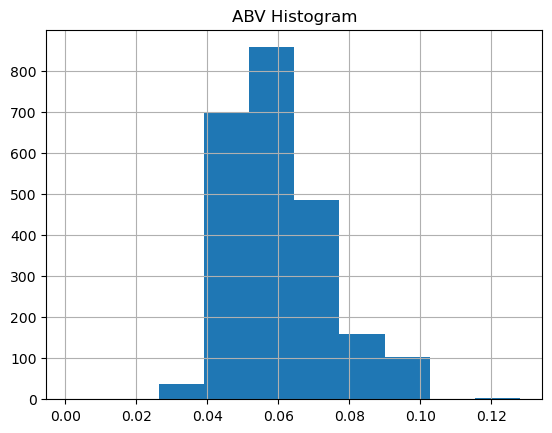

In [38]:
df['abv'].hist();
plt.title('ABV Histogram');

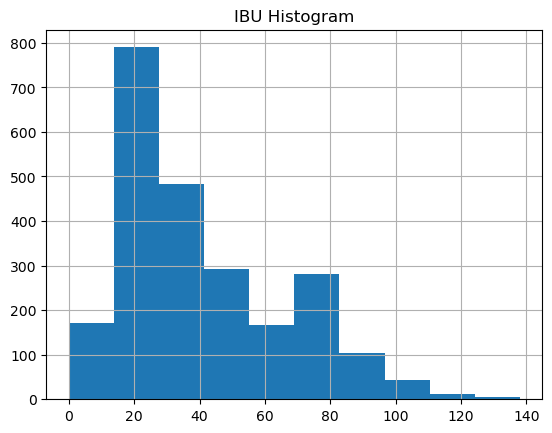

In [39]:
df['ibu'].hist();
plt.title('IBU Histogram');

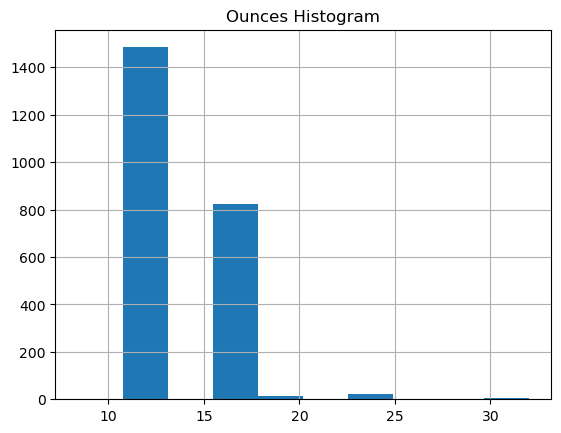

In [40]:
df['ounces'].hist();
plt.title('Ounces Histogram');

### Investigate the categorical data

In [41]:
df['style'].nunique()

100

In [42]:
df['style'].value_counts().head(20)

American IPA                      417
American Pale Ale (APA)           239
American Amber / Red Ale          125
American Blonde Ale               104
American Double / Imperial IPA    103
American Pale Wheat Ale            95
American Brown Ale                 68
American Porter                    65
Saison / Farmhouse Ale             52
Fruit / Vegetable Beer             49
Witbier                            49
Kölsch                             42
Hefeweizen                         39
Cider                              37
American Stout                     37
American Pale Lager                37
German Pilsener                    36
American Black Ale                 35
Märzen / Oktoberfest               29
Czech Pilsener                     28
Name: style, dtype: int64

In [43]:
df['name_brewery'].nunique()

539

In [44]:
df['name_brewery'].value_counts().head(20)

Brewery Vivant                     60
Oskar Blues Brewery                42
Sun King Brewing Company           36
Cigar City Brewing Company         25
Sixpoint Craft Ales                24
Hopworks Urban Brewery             23
Stevens Point Brewery              22
21st Amendment Brewery             20
Great Crescent Brewery             20
Bonfire Brewing Company            19
SanTan Brewing Company             19
Great River Brewery                18
Upslope Brewing Company            18
Tallgrass Brewing Company          18
Anderson Valley Brewing Company    18
Sockeye Brewing Company            17
New Belgium Brewing Company        17
Rivertowne Brewing Company         15
Golden Road Brewing                15
18th Street Brewery                14
Name: name_brewery, dtype: int64

### Investigate correlation

In [45]:
df.corr()

,abv,ibu,ounces
abv,1.000000,0.567179,0.172529
ibu,0.567179,1.000000,0.066511
ounces,0.172529,0.066511,1.000000


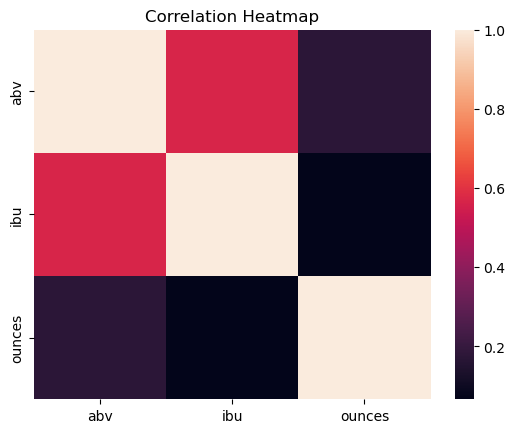

In [46]:
sns.heatmap(df.corr());
plt.title('Correlation Heatmap');

From this correlation heatmap, it seems `abv` and `ibu` are somewhat correlated, while `ounces` is not strongly correlated with either `abv` or `ibu`.

We can also use a pairplot to look at this.

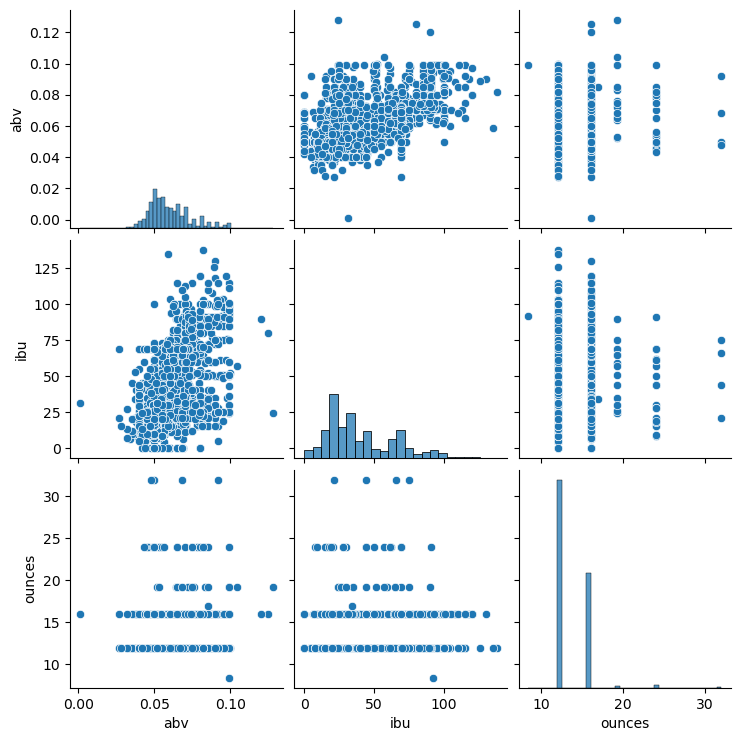

In [47]:
sns.pairplot(df[['abv', 'ibu', 'ounces']]);

Let's take a closer look at `ibu` vs. `abv`

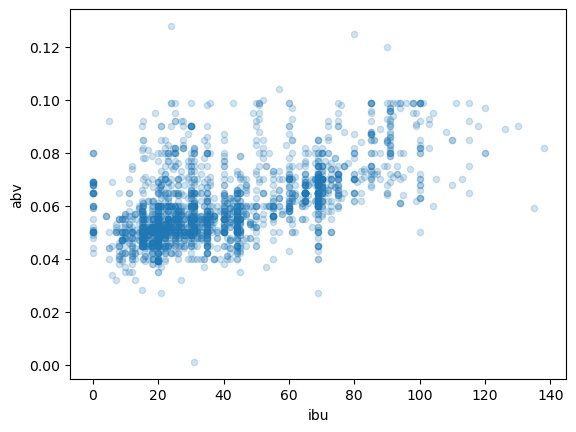

In [48]:
df.plot(kind='scatter', x='ibu', y='abv', alpha=0.2);

We can plot a regression model to view the positive correlation.

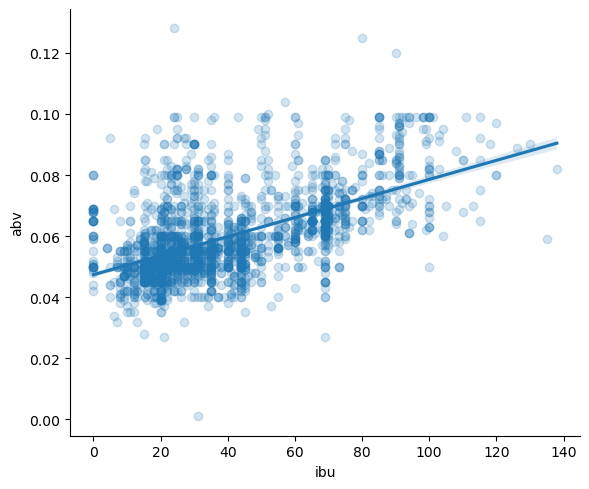

In [49]:
sns.lmplot(
    x='ibu',
    y='abv',
    data=df,
    aspect=1.2,
    scatter_kws={'alpha':0.2}
);

# Modeling the data

## Creating a linear regression model

Because we want to do a `train_test_split` to test the models and we want to try different combinations of features, we'll create a function to take in data, create a model and return the RMSE.

In [50]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
def train_test_rmse(model_df, feature_cols):
    X = model_df[feature_cols]
    y = model_df.abv
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
    
    linreg = LinearRegression()
    linreg.fit(X_train.values, y_train.values)
    
    y_pred = linreg.predict(X_test.values)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_pred': y_pred,
        'model': linreg,
        'score': linreg.score(X_test.values, y_test.values),
        'intercept': linreg.intercept_,
        'coef': linreg.coef_,
        'rmse': rmse,
    }

In [52]:
ibu_model = train_test_rmse(df, ['ibu'])
ounces_model = train_test_rmse(df, ['ounces'])
both_model = train_test_rmse(df, ['ibu', 'ounces'])

For each model, we can evaluate it in a few ways:
* View predictions vs. actuals on a scatterplot
* Score the model
* Compare RMSE

### `ibu` model

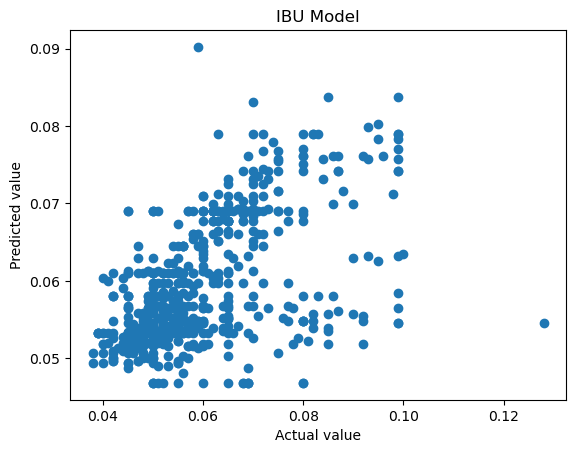

In [53]:
plt.scatter(ibu_model['y_test'], ibu_model['y_pred']);
plt.title('IBU Model');
plt.xlabel('Actual value');
plt.ylabel('Predicted value');

In [54]:
print(ibu_model['score'])

0.27006610434627787


In [55]:
print(ibu_model['rmse'])

0.011796859088209705


In [56]:
print(ibu_model['coef'])

[0.00032154]


### `ounces` model

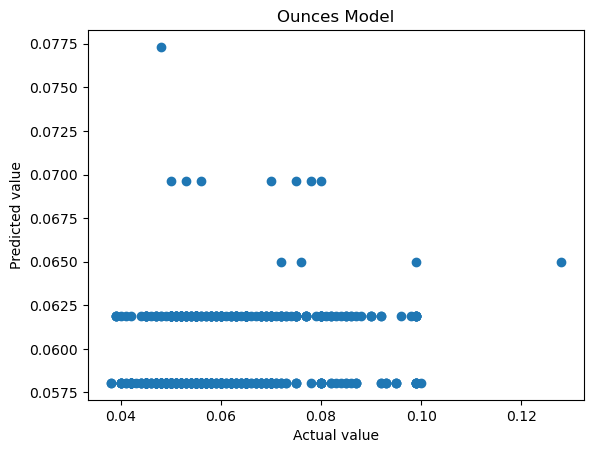

In [57]:
plt.scatter(ounces_model['y_test'], ounces_model['y_pred']);
plt.title('Ounces Model');
plt.xlabel('Actual value');
plt.ylabel('Predicted value');

In [58]:
print(ounces_model['score'])

0.03269098625506606


In [59]:
print(ounces_model['rmse'])

0.013580233695805077


In [60]:
print(ounces_model['coef'])

[0.00096378]


### Both `ibu` and `ounces` model

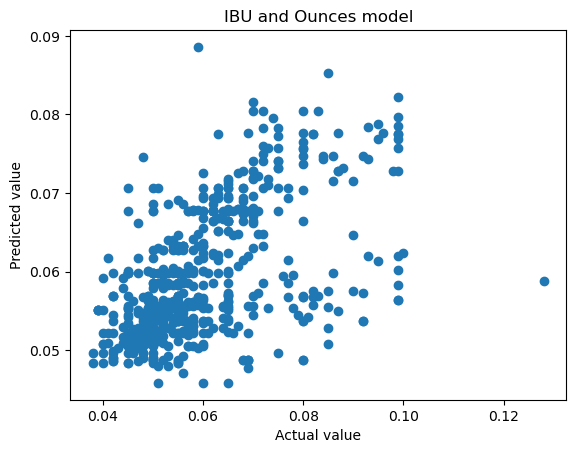

In [61]:
plt.scatter(both_model['y_test'], both_model['y_pred']);
plt.xlabel('Actual value');
plt.title('IBU and Ounces model');
plt.ylabel('Predicted value');

In [62]:
print(both_model['score'])

0.2943061321875634


In [63]:
print(both_model['rmse'])

0.011599327162903648


In [64]:
list(zip(['ibu', 'ounces'], both_model['coef']))

[('ibu', 0.0003167999941338565), ('ounces', 0.0007388886812607996)]

### Comparing with Null RMSE

In [65]:
y_null = np.zeros_like(ibu_model['y_test'], dtype=float)
y_null.fill(ibu_model['y_test'].mean())

In [66]:
np.sqrt(metrics.mean_squared_error(ibu_model['y_test'], y_null))

0.013807804399367851

Comparing the three models to the null model, we can see using `ounces` by itself is not very useful, but `ibu` creates a decent model, which is slightly improved by combining `ibu` and `ounces`.

| Model Type | Score | RMSE |
|:-----------|:------|:-----|
| `ounces` | 0.03 | 0.0136 |
| `ibu` | 0.27 | 0.0118 |
| `ibu` and `ounces` | 0.29 | 0.0116 |
| null | 0.0 | 0.0138 |

### Utilizing style through dummies

We can turn the `style` column into dummy columns to try and incorporate the `style` values into the model.

In [67]:
dummies = pd.get_dummies(df['style'], prefix='style', drop_first=True)

In [68]:
dummy_df = pd.concat([df, dummies], axis=1)

In [69]:
dummy_df.sample(5)

,abv,ibu,name_beer,style,brewery_id,ounces,name_brewery,city,state,style_Altbier,...,style_Schwarzbier,style_Scotch Ale / Wee Heavy,style_Scottish Ale,style_Shandy,style_Smoked Beer,style_Tripel,style_Vienna Lager,style_Wheat Ale,style_Winter Warmer,style_Witbier
id,,,,,,,,,,,,,,,,,,,,,
2313,0.067,71.0,Mothman Black IPA,American Black Ale,156,12.0,Greenbrier Valley Brewing Company,Lewisburg,WV,0,...,0,0,0,0,0,0,0,0,0,0
389,0.053,22.0,Great Crescent Blonde Ale (2011),American Blonde Ale,165,16.0,Great Crescent Brewery,Aurora,IN,0,...,0,0,0,0,0,0,0,0,0,0
939,0.070,73.0,Toxic Sludge,American Black Ale,489,16.0,Blue Point Brewing Company,Patchogue,NY,0,...,0,0,0,0,0,0,0,0,0,0
865,0.055,10.0,Widespread Wit,Witbier,365,16.0,Great River Brewery,Davenport,IA,0,...,0,0,0,0,0,0,0,0,0,1
1020,0.099,85.0,3Beans,Baltic Porter,46,12.0,Sixpoint Craft Ales,Brooklyn,NY,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_dummies = dummy_df.drop(columns=['name_beer', 'style', 'brewery_id', 'name_brewery', 'city', 'state'])

In [71]:
feature_cols = list(df_dummies.columns)[1:]

In [72]:
dummy_model = train_test_rmse(df_dummies, feature_cols)

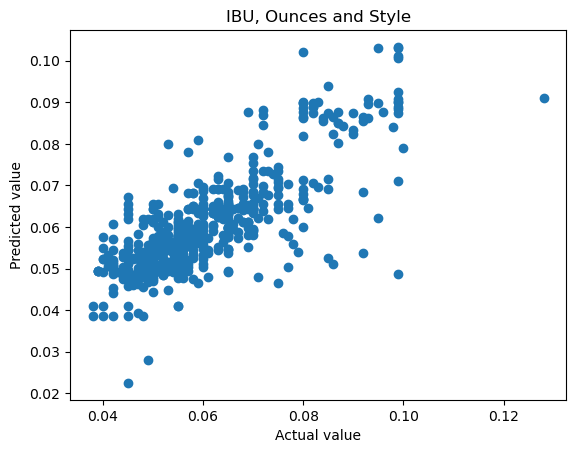

In [73]:
plt.scatter(dummy_model['y_test'], dummy_model['y_pred']);
plt.title('IBU, Ounces and Style');
plt.xlabel('Actual value');
plt.ylabel('Predicted value');

In [74]:
print(dummy_model['score'])

0.6129786905195177


In [75]:
print(dummy_model['rmse'])

0.008589978270695955


In [76]:
list(zip(feature_cols, dummy_model['coef']))

[('ibu', 0.0002530033048302522),
 ('ounces', 0.00030920503239952393),
 ('style_Altbier', 0.00263991099832784),
 ('style_American Adjunct Lager', 0.001987604369510643),
 ('style_American Amber / Red Ale', 0.005229182716170264),
 ('style_American Amber / Red Lager', -0.0007978725032072101),
 ('style_American Barleywine', 0.03234033111054086),
 ('style_American Black Ale', 0.007287206934772448),
 ('style_American Blonde Ale', 0.0006088634977467755),
 ('style_American Brown Ale', 0.0063745167146941496),
 ('style_American Dark Wheat Ale', 0.002781612840268664),
 ('style_American Double / Imperial IPA', 0.020041218351312312),
 ('style_American Double / Imperial Pilsner', 0.011942381730895006),
 ('style_American Double / Imperial Stout', 0.03450947858544941),
 ('style_American IPA', 0.0034314825700574756),
 ('style_American India Pale Lager', 0.007104923041273198),
 ('style_American Malt Liquor', 0.039205447075958993),
 ('style_American Pale Ale (APA)', -0.0002342603122520194),
 ('style_Ameri

The addition of the `style` information greatly improves the model, increasing the score and reducing the RMSE.

| Model Type | Score | RMSE |
|:-----------|:------|:-----|
| `ounces` | 0.03 | 0.0136 |
| `ibu` | 0.27 | 0.0118 |
| `ibu` and `ounces` | 0.29 | 0.0116 |
| dummies | 0.61 | 0.0086 |
| null | 0.0 | 0.0138 |

## Decision Tree

Another type of model to try is a decision tree model.

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [78]:
X = dummy_df[feature_cols]
y = dummy_df.abv

We'll test a range of `max_depth` values to find the best value.

In [79]:
max_depth_range = list(range(1,20))
RMSE_scores = []
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=2)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

From the plot below, we can see a `max_depth` of 10 is best.

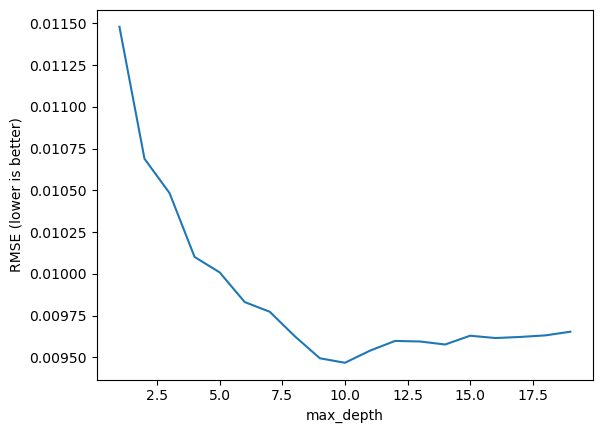

In [80]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

Using that information, we'll create a decision tree model with a `max_depth` of 10.

In [81]:
treereg = DecisionTreeRegressor(max_depth=10, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=2)

We can then export that decision tree and view it (as a VERY large image)

In [82]:
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='./assets/tree_diagram.dot', feature_names=X.columns)

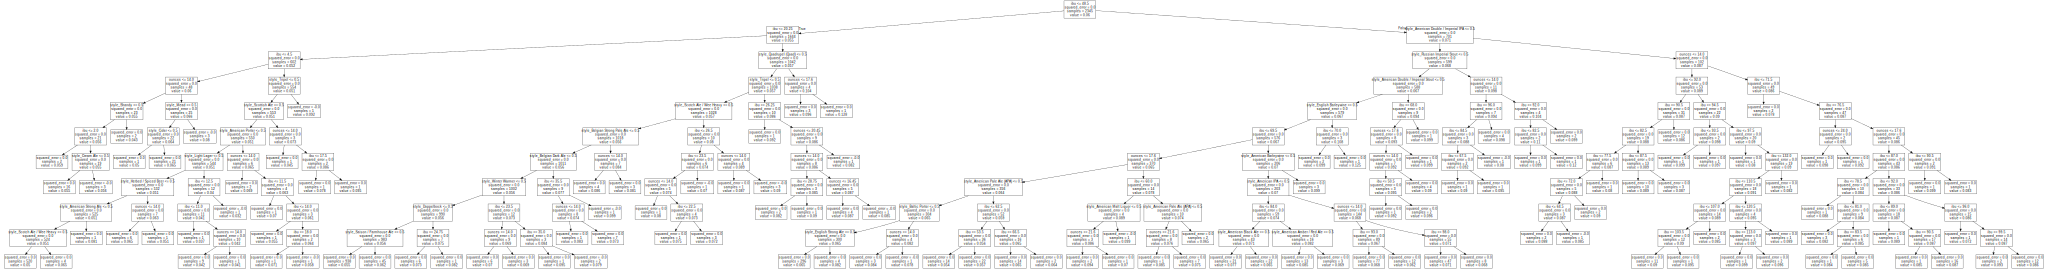

In [115]:
from IPython.core.display import SVG
SVG(filename='./assets/tree_diagram.svg')

In [156]:
y_pred = treereg.predict(X_test)

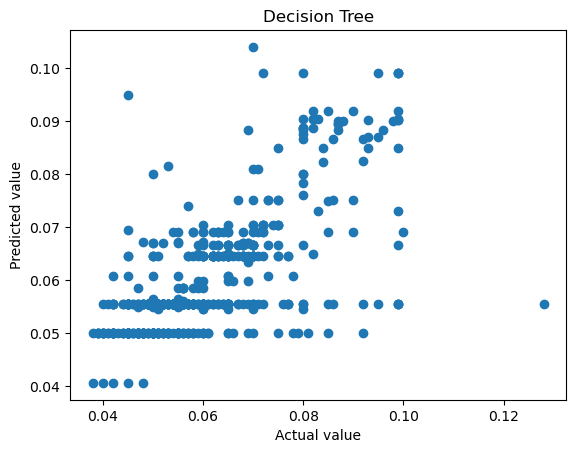

In [157]:
plt.scatter(y_test, y_pred);
plt.title('Decision Tree');
plt.xlabel('Actual value');
plt.ylabel('Predicted value');

In [158]:
print(treereg.score(X, y))

0.5850708452080271


In [160]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.010277452365813842


Using a decision tree slightly decreases results over the best linear model.

| Model Type | Score | RMSE |
|:-----------|:------|:-----|
| `ounces` Linear | 0.03 | 0.0136 |
| `ibu` Linear | 0.27 | 0.0118 |
| `ibu` and `ounces` Linear | 0.29 | 0.0116 |
| dummies Linear | 0.61 | 0.0086 |
| Decision Tree | 0.59 | 0.0103 |
| null | 0.0 | 0.0138 |

## Random Forest

Finally, we'll look at a Random Forest model.

In [120]:
from sklearn.ensemble import RandomForestRegressor

We can create a group of models using a range of `n_estimator` values to see what works best.

In [148]:
# List of values to try for n_estimators:
estimator_range = list(range(10, 310, 10))

# List to store the average RMSE for each value of n_estimators:
RMSE_scores = []

# Use five-fold cross-validation with each value of n_estimators:
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=2)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

From the plot below, we can see the RMSE stabilizes around an `n_estimators` value of 170

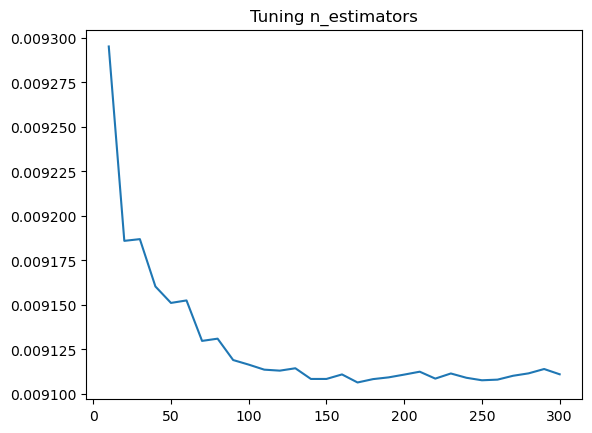

In [149]:
plt.plot(estimator_range, RMSE_scores);
plt.title('Tuning n_estimators');

We can also optimize for `num_features`

In [140]:
# List of values to try for max_features:
feature_range = list(range(1, len(feature_cols)+1))

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features.
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=170, max_features=feature, random_state=2)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

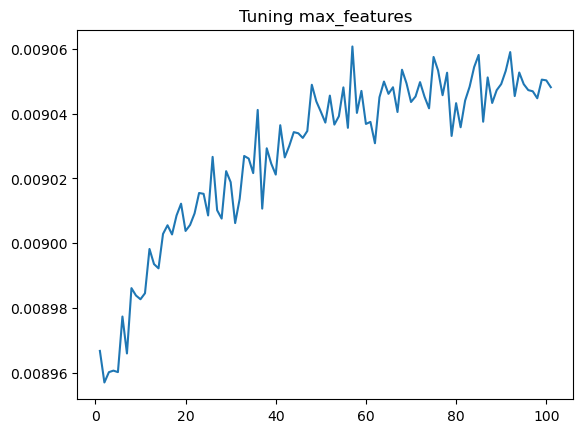

In [147]:
plt.plot(feature_range, RMSE_scores);
plt.title('Tuning max_features');

This shows a `max_features` value <= 5 is best.
Using that information, we can create our model.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [162]:
rfreg = RandomForestRegressor(n_estimators=170, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestRegressor(max_features=5, n_estimators=170, oob_score=True,
                      random_state=1)

In [165]:
pd.DataFrame({'feature':X.columns, 'importance':rfreg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,ibu,0.404027
11,style_American Double / Imperial IPA,0.129310
1,ounces,0.040234
14,style_American IPA,0.031740
88,style_Russian Imperial Stout,0.027063
...,...,...
98,style_Wheat Ale,0.000087
63,style_Grisette,0.000000
78,style_Märzen,0.000000
95,style_Smoked Beer,0.000000


In [166]:
y_pred = rfreg.predict(X_test)

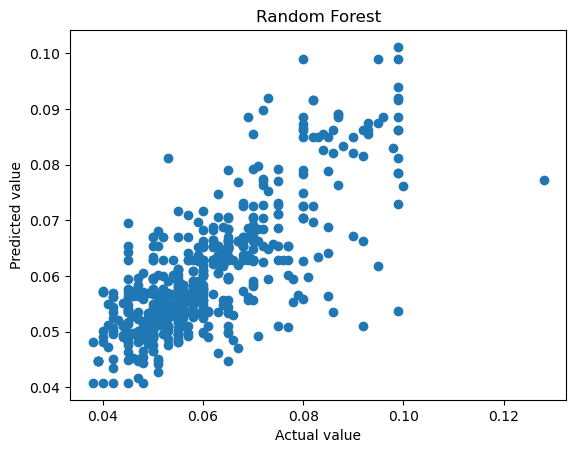

In [167]:
plt.scatter(y_test, y_pred);
plt.title('Random Forest');
plt.xlabel('Actual value');
plt.ylabel('Predicted value');

In [168]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Compute the validation score
print(rfreg.score(X_test, y_test))

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
print(np.mean(np.sqrt(-scores)))

0.5769417368587638
0.586938889066669
0.008991030237547522


From these values, it appears the Random Forest does slightly better than the single Decision Tree model (but still worse than the best linear regression model).

| Model Type | Score | RMSE |
|:-----------|:------|:-----|
| `ounces` Linear | 0.03 | 0.0136 |
| `ibu` Linear | 0.27 | 0.0118 |
| `ibu` and `ounces` Linear | 0.29 | 0.0116 |
| dummies Linear | 0.61 | 0.0086 |
| Decision Tree | 0.59 | 0.0103 |
| Random Forest | 0.59 | 0.0090 |
| null | 0.0 | 0.0138 |

We can reduce the number of features to try and improve the model.

In [136]:
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train.values).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train.values).shape)

(1761, 15)
(1761, 51)


We'll use the mean threshold

In [137]:
X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test.values)

In [139]:
rfreg = RandomForestRegressor(n_estimators=170, max_features=3, random_state=2)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
print(np.mean(np.sqrt(-scores)))

0.010346959324030621


Error went up, so we'll still use the linear regression model.